In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
#importing data 
data=pd.read_csv('C:/Users/Pavan786/Downloads/InsuranceDataset.csv')

In [4]:
data.info() #24 columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   Area_Service                           1046119 non-null  object 
 1   Hospital County                        1046119 non-null  object 
 2   Hospital Id                            1046119 non-null  float64
 3   Age                                    1048575 non-null  object 
 4   Gender                                 1048575 non-null  object 
 5   Cultural_group                         1048575 non-null  object 
 6   ethnicity                              1048575 non-null  object 
 7   Days_spend_hsptl                       1048575 non-null  object 
 8   Admission_type                         1048575 non-null  object 
 9   Home or self care,                     1048575 non-null  object 
 10  ccs_diagnosis_code                     104

In [5]:
#dropping Hospital Id 
data=data.drop(['Hospital Id'],axis=1)

In [6]:
for col in data.columns:
    print("******* {} *******".format(col))
    print(data[col].unique())
#comments :
    # 1. Hospital county has more classes 
    # 2. Days_spend_hsptl has '120 +' which is irrelevant 
    # 3. Home or self care has more classes

******* Area_Service *******
['Western NY' nan 'Finger Lakes' 'Central NY' 'Southern Tier'
 'Capital/Adirond' 'Hudson Valley' 'New York City']
******* Hospital County *******
['Allegany' nan 'Cattaraugus' 'Chautauqua' 'Erie' 'Genesee' 'Niagara'
 'Orleans' 'Wyoming' 'Chemung' 'Livingston' 'Monroe' 'Ontario' 'Schuyler'
 'Steuben' 'Wayne' 'Yates' 'Oswego' 'Broome' 'Cayuga' 'Chenango'
 'Cortland' 'Herkimer' 'Jefferson' 'Lewis' 'Madison' 'Oneida' 'Onondaga'
 'St Lawrence' 'Tompkins' 'Albany' 'Clinton' 'Columbia' 'Delaware' 'Essex'
 'Franklin' 'Fulton' 'Montgomery' 'Otsego' 'Rensselaer' 'Saratoga'
 'Schenectady' 'Schoharie' 'Warren' 'Dutchess' 'Orange' 'Putnam'
 'Rockland' 'Sullivan' 'Ulster' 'Westchester' 'Bronx']
******* Age *******
['30 to 49' '70 or Older' '0 to 17' '18 to 29' '50 to 69']
******* Gender *******
['F' 'M' 'U']
******* Cultural_group *******
['White' 'Other Race' 'Black/African American' 'Unknown']
******* ethnicity *******
['Not Span/Hispanic' 'Spanish/Hispanic' 'Unknown']

[ 1.  2.  3.  4. nan]
******* Surg_Description *******
['Medical' 'Surgical' 'Not Applicable']
******* Weight_baby *******
[   0 2900 3200 3000 3600 3800 3100 3300 3500 3400 4300 2000 2300 2600
 2700 3700 3900 2200 2800 4200 4800 4000 4100 2500 2400 2100 4400 1800
 5100 5400 5800 1900  500 4700  700 4600 4500 1000  400 1700 1500 4900
 6000 1300 1100 1200  300 1600 5200  900  600 1400  800  200 5000 5300
 5600 5700 7000 5500  100 7300 8000 6100 6900 9000 8500 6400 8400 5900]
******* Abortion *******
['N' 'Y']
******* Emergency dept_yes/No *******
['Y' 'N']
******* Tot_charg *******
[  5511.95   4783.2    3829.15 ... 104629.78  27521.41  24832.23]
******* Tot_cost *******
[ 5582.49  5162.82  4056.52 ... 13896.82 24746.64  6766.04]
******* ratio_of_total_costs_to_total_charges *******
[1.01279761 1.0793645  1.05937866 ... 0.2365162  0.24584628 0.20033072]
******* Result *******
[1 0]
******* Payment_Typology *******
[1 2 3 4 5]


In [7]:
#taking categorical features seperately 
categorical_feature_list = ['Area_Service','Hospital County','Age','Gender','Cultural_group','ethnicity','Admission_type','Home or self care,','apr_drg_description','Code_illness','Mortality risk','Surg_Description','Abortion','Emergency dept_yes/No','Payment_Typology','Result']
data_cat=data[categorical_feature_list]
data_cat.head()

,Area_Service,Hospital County,Age,Gender,Cultural_group,ethnicity,Admission_type,"Home or self care,",apr_drg_description,Code_illness,Mortality risk,Surg_Description,Abortion,Emergency dept_yes/No,Payment_Typology,Result
0,Western NY,Allegany,30 to 49,F,White,Not Span/Hispanic,Elective,Home or Self Care,Other pneumonia,1,1.0,Medical,N,Y,1,1
1,Western NY,Allegany,70 or Older,F,White,Not Span/Hispanic,Urgent,Short-term Hospital,Cellulitis & other skin infections,3,2.0,Medical,N,Y,1,1
2,Western NY,Allegany,30 to 49,F,White,Not Span/Hispanic,Urgent,Home or Self Care,Other pneumonia,1,1.0,Medical,N,Y,1,1
3,Western NY,Allegany,0 to 17,F,White,Not Span/Hispanic,Urgent,Home or Self Care,Other pneumonia,1,1.0,Medical,N,Y,1,0
4,Western NY,Allegany,70 or Older,F,White,Not Span/Hispanic,Elective,Home or Self Care,Other pneumonia,2,3.0,Medical,N,Y,1,1


In [8]:
#taking numerical features 
num_features=[]
for col in data.columns:
    if col not in categorical_feature_list:
      num_features.append(col)

data_num = data[num_features]
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   Days_spend_hsptl                       1048575 non-null  object 
 1   ccs_diagnosis_code                     1048575 non-null  int64  
 2   ccs_procedure_code                     1048575 non-null  int64  
 3   Weight_baby                            1048575 non-null  int64  
 4   Tot_charg                              1048575 non-null  float64
 5   Tot_cost                               1048575 non-null  float64
 6   ratio_of_total_costs_to_total_charges  1048575 non-null  float64
dtypes: float64(3), int64(3), object(1)
memory usage: 56.0+ MB


In [9]:
#counting classes for each categorical variable 
for i in range(0,len(data_cat.columns)):
    count=data[data_cat.columns[i]].nunique()
    print(" unique count in {} is : {} ".format(data_cat.columns[i],count))
#Hospital County has 51 classes 
#Home or  self care has 19 classes
#apr_drg_description has 316 classes

 unique count in Area_Service is : 7 
 unique count in Hospital County is : 51 
 unique count in Age is : 5 
 unique count in Gender is : 3 
 unique count in Cultural_group is : 4 
 unique count in ethnicity is : 3 
 unique count in Admission_type is : 6 
 unique count in Home or self care, is : 19 
 unique count in apr_drg_description is : 316 
 unique count in Code_illness is : 5 
 unique count in Mortality risk is : 4 
 unique count in Surg_Description is : 3 
 unique count in Abortion is : 2 
 unique count in Emergency dept_yes/No is : 2 
 unique count in Payment_Typology is : 5 
 unique count in Result is : 2 


In [10]:
#dropping  above three
data_cat=data_cat.drop(['Hospital County','Home or self care,','apr_drg_description'],axis=1)

In [11]:
# In 'Days_spend_hsptl'  value '120 +' 
#which causes issue while plotting 
#changing that to '120'
for i in range(0,len(data_num['Days_spend_hsptl'])):
     if data_num.iloc[i,0]=='120 +':
        data_num.iloc[i,0]='120'

C:\Users\Pavan786\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [12]:
data_num.info()
#Days_spend_hsptl is in Object type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   Days_spend_hsptl                       1048575 non-null  object 
 1   ccs_diagnosis_code                     1048575 non-null  int64  
 2   ccs_procedure_code                     1048575 non-null  int64  
 3   Weight_baby                            1048575 non-null  int64  
 4   Tot_charg                              1048575 non-null  float64
 5   Tot_cost                               1048575 non-null  float64
 6   ratio_of_total_costs_to_total_charges  1048575 non-null  float64
dtypes: float64(3), int64(3), object(1)
memory usage: 56.0+ MB


In [13]:
#changing it to Int type
data_num['Days_spend_hsptl']=pd.to_numeric(data_num['Days_spend_hsptl'],downcast='integer')
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   Days_spend_hsptl                       1048575 non-null  int8   
 1   ccs_diagnosis_code                     1048575 non-null  int64  
 2   ccs_procedure_code                     1048575 non-null  int64  
 3   Weight_baby                            1048575 non-null  int64  
 4   Tot_charg                              1048575 non-null  float64
 5   Tot_cost                               1048575 non-null  float64
 6   ratio_of_total_costs_to_total_charges  1048575 non-null  float64
dtypes: float64(3), int64(3), int8(1)
memory usage: 49.0 MB


C:\Users\Pavan786\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


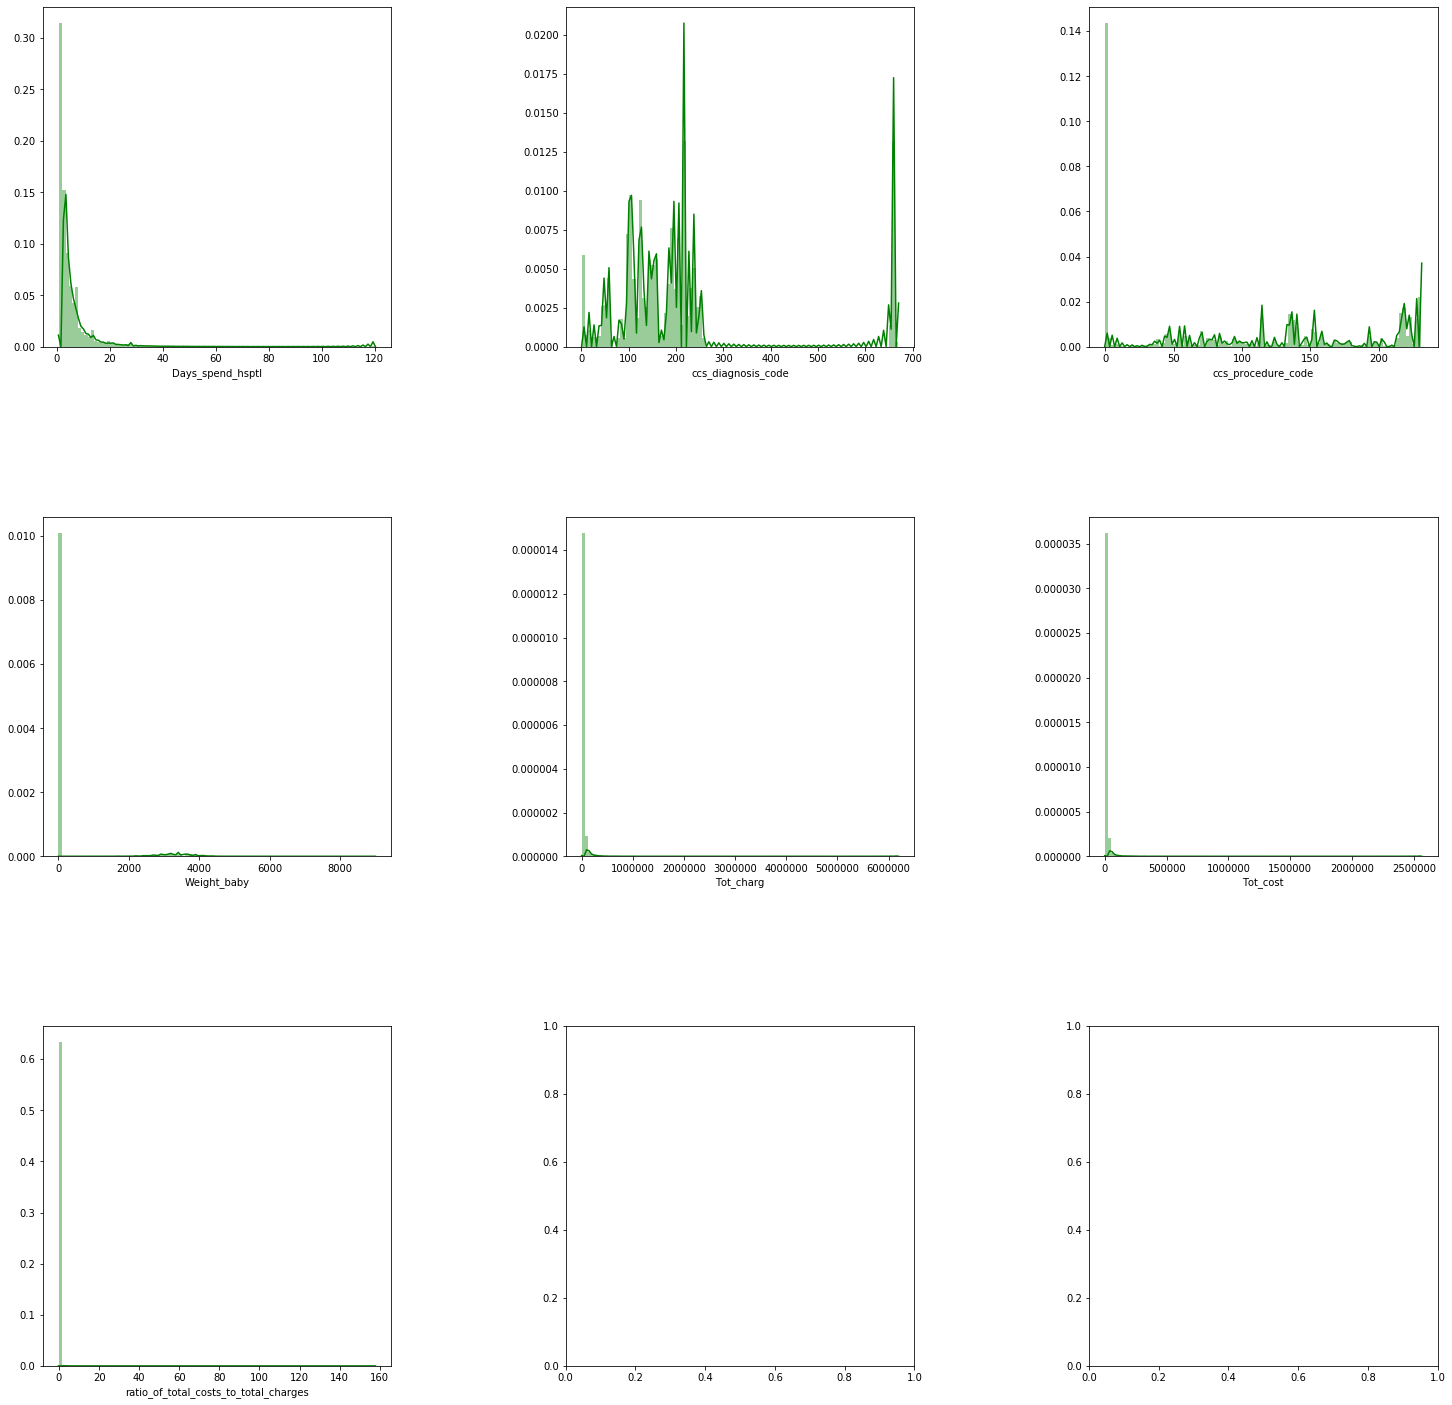

In [14]:
fig,ax=plt.subplots(3,3,figsize=(25,25))
for i,ax in enumerate(fig.axes):
    if i < len(data_num.columns):
        sns.distplot(data_num.iloc[:,i],color='g', bins=100,kde_kws={'bw':0.1},ax=ax)
        plt.subplots_adjust(wspace=.5, hspace=.5)
#comments 
        # In all variables zeros are more as a result distribution is not clear
        # we try removing those zeros for plotting purpose

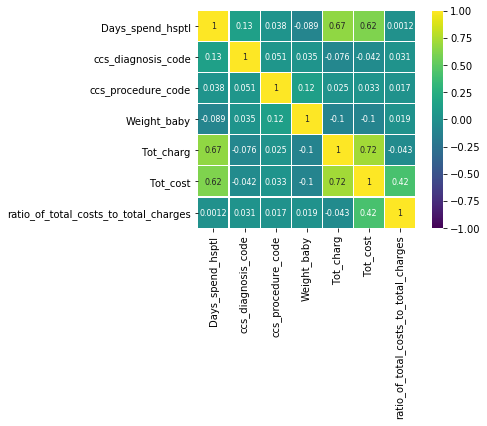

In [15]:
#heatmap
cor=data_num.corr()
sns.heatmap(cor,cmap='viridis',vmax=1.0,vmin=-1.0,linewidths=0.1,annot=True,annot_kws={'size':8},square=True)
#comments
          # 1. Tot_charg is correlated with  Days_spend_hsptl --0.67  
          # 2. Tot_cost is correlated with  Tot_charg-----0.72

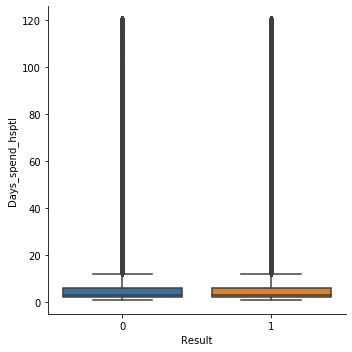

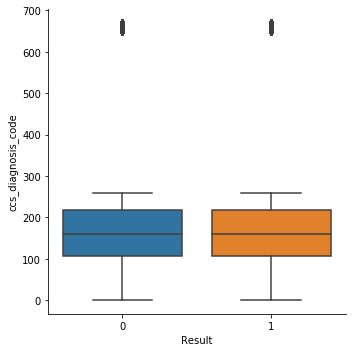

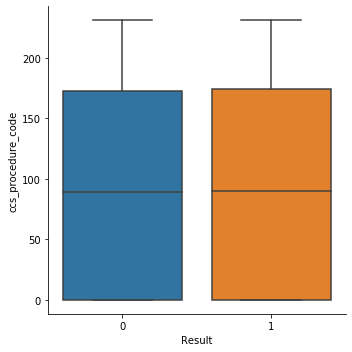

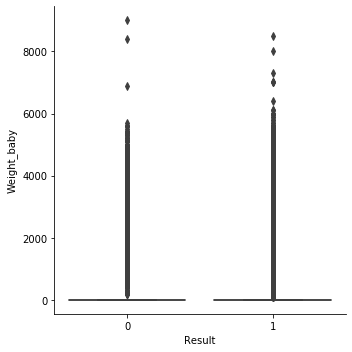

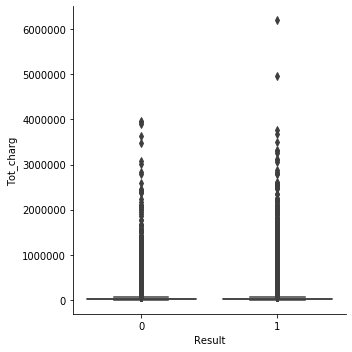

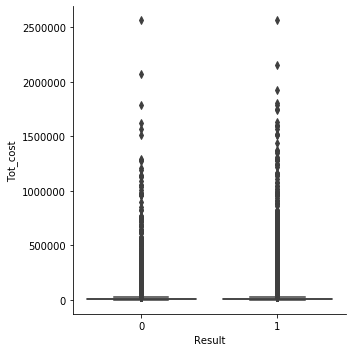

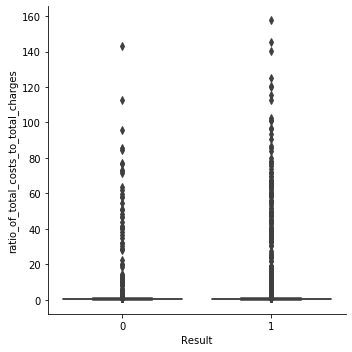

In [16]:
################  numerical vs Target ########       
data_num=data_num.join(data['Result'])
for i in range(0,7):
 sns.catplot(x='Result',y=data_num.columns[i],kind='box',data=data_num)
 #ccs_diagnosis_code and  ccs_procedure_code showing same proportions with 1 and 0

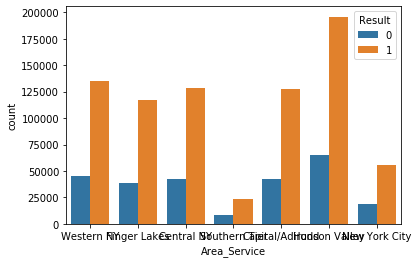

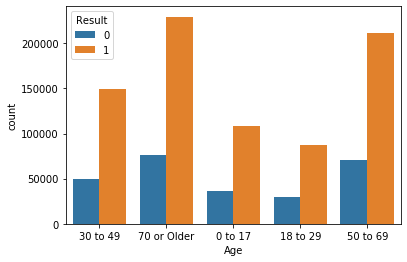

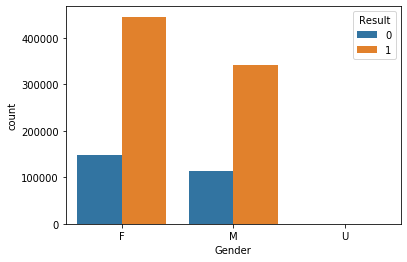

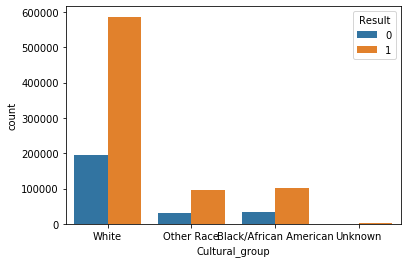

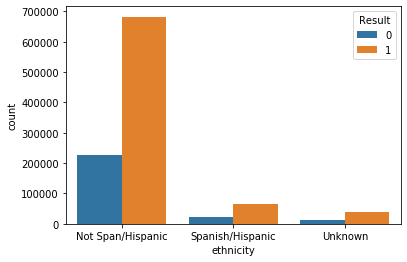

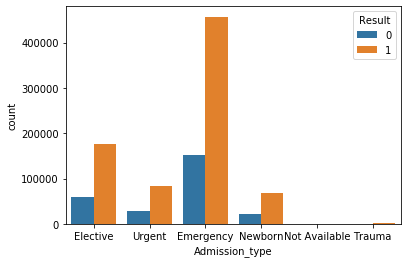

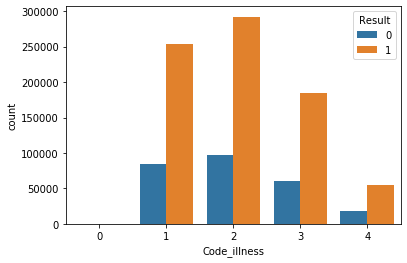

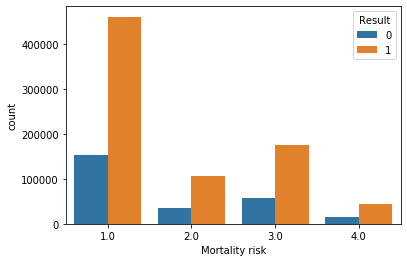

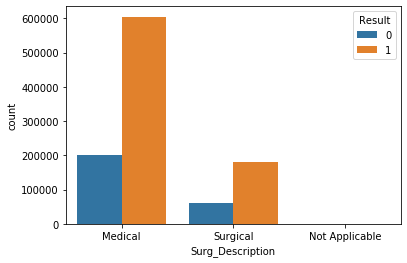

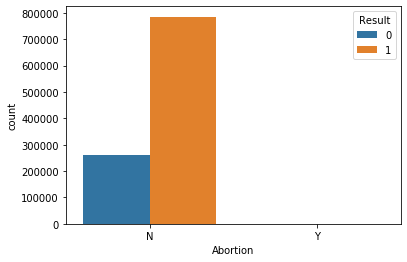

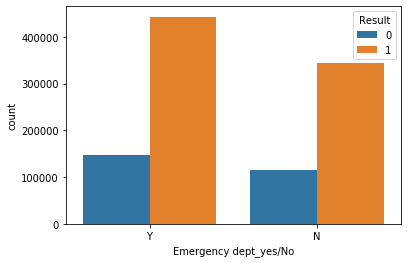

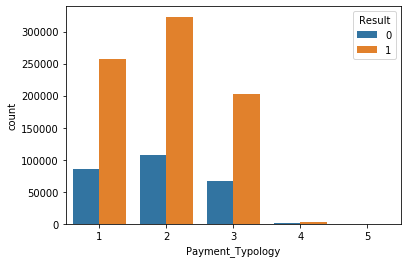

In [17]:
for i in range(0,len(data_cat.columns)):
  if i < len(data_cat.columns)-1:  
    fig,axes =plt.subplots(1,1)
    for j,ax in enumerate(fig.axes):
     sns.countplot(x=data_cat.columns[j+i], hue="Result", data=data_cat,ax=ax) 


#comments :
          # 1. In Gender remove "U"
          # 2. In cultural group Remove Unknown
          # 3. In Admission type remove available,Trauma
          # 4. In code_illness remove 'zero'
          # 5. In Surg_Description remove 'Not Applicable'
          # 6. Remove Abortion 

In [18]:
data_cat.isnull().sum()

Area_Service             2456
Age                         0
Gender                      0
Cultural_group              0
ethnicity                   0
Admission_type              0
Code_illness                0
Mortality risk             42
Surg_Description            0
Abortion                    0
Emergency dept_yes/No       0
Payment_Typology            0
Result                      0
dtype: int64

In [19]:
# replacing NaN for Area_Service with mode
mode_Area_Service = data_cat['Area_Service'].mode().values[0]
mode_Area_Service
data_cat['Area_Service'].replace(np.nan,mode_Area_Service,inplace=True)

In [20]:
# replacing NaN for Area_Service with mode
mode_Mortality_risk = data_cat['Mortality risk'].mode().values[0]
mode_Mortality_risk
data_cat['Mortality risk'].replace(np.nan,mode_Mortality_risk,inplace=True)

In [23]:
licat=[]
licat=data_cat.columns.values.tolist()
licat.remove('Result')
licat
data_cat_df=pd.get_dummies(data_cat,columns=licat,drop_first=False)

In [110]:
#data_num=data_num.drop(['Result'],axis=1)
data_final = pd.concat([data_num,data_cat_df],axis=1)
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 57 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   Days_spend_hsptl                       1048575 non-null  int8   
 1   ccs_diagnosis_code                     1048575 non-null  int64  
 2   ccs_procedure_code                     1048575 non-null  int64  
 3   Weight_baby                            1048575 non-null  int64  
 4   Tot_charg                              1048575 non-null  float64
 5   Tot_cost                               1048575 non-null  float64
 6   ratio_of_total_costs_to_total_charges  1048575 non-null  float64
 7   Result                                 1048575 non-null  int64  
 8   Area_Service_Capital/Adirond           1048575 non-null  uint8  
 9   Area_Service_Central NY                1048575 non-null  uint8  
 10  Area_Service_Finger Lakes              104

In [26]:
# feature selection for numeric input and categorical output

from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# define feature selection
fs = SelectKBest(score_func=f_classif, k=3)
# apply feature selection
X_selected = fs.fit_transform(data_num, data_cat_df['Result'])

In [27]:
X_selected

array([[4.0000000e+00, 5.5119500e+03, 5.5824900e+03],
       [4.0000000e+00, 4.7832000e+03, 5.1628200e+03],
       [3.0000000e+00, 3.8291500e+03, 4.0565200e+03],
       ...,
       [1.3000000e+01, 1.0462978e+05, 2.4746640e+04],
       [2.0000000e+00, 2.7521410e+04, 6.7660400e+03],
       [2.0000000e+00, 2.4832230e+04, 4.9746600e+03]])

In [28]:
data_num.head(5)

,Days_spend_hsptl,ccs_diagnosis_code,ccs_procedure_code,Weight_baby,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges
0,4,122,0,0,5511.95,5582.49,1.012798
1,4,197,0,0,4783.20,5162.82,1.079365
2,3,122,0,0,3829.15,4056.52,1.059379
3,1,122,0,0,1108.20,1644.75,1.484167
4,3,122,0,0,3418.18,3370.87,0.986161


In [28]:
#top 3 features selected 
selected_num=['Days_spend_hsptl','Tot_charg','Tot_cost']
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   Days_spend_hsptl                       1048575 non-null  int8   
 1   ccs_diagnosis_code                     1048575 non-null  int64  
 2   ccs_procedure_code                     1048575 non-null  int64  
 3   Weight_baby                            1048575 non-null  int64  
 4   Tot_charg                              1048575 non-null  float64
 5   Tot_cost                               1048575 non-null  float64
 6   ratio_of_total_costs_to_total_charges  1048575 non-null  float64
dtypes: float64(3), int64(3), int8(1)
memory usage: 49.0 MB


In [53]:
data_cat_df.iloc[:,1:50].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 49 columns):
 #   Column                                 Non-Null Count    Dtype
---  ------                                 --------------    -----
 0   Area_Service_Capital/Adirond           1048575 non-null  uint8
 1   Area_Service_Central NY                1048575 non-null  uint8
 2   Area_Service_Finger Lakes              1048575 non-null  uint8
 3   Area_Service_Hudson Valley             1048575 non-null  uint8
 4   Area_Service_New York City             1048575 non-null  uint8
 5   Area_Service_Southern Tier             1048575 non-null  uint8
 6   Area_Service_Western NY                1048575 non-null  uint8
 7   Age_0 to 17                            1048575 non-null  uint8
 8   Age_18 to 29                           1048575 non-null  uint8
 9   Age_30 to 49                           1048575 non-null  uint8
 10  Age_50 to 69                           1048575 non-null  uint8
 11

In [52]:
# feature selection for categorical input and categorical output
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(data_cat_df.iloc[:,1:50], data_cat_df['Result'])
X_train_fs = fs.transform(data_cat_df.iloc[:,1:50])

In [54]:
for i in range(len(fs.scores_)):
    print(' %s: %f' % (data_cat_df.iloc[:,1:50].columns[i],fs.scores_[i]))

 Area_Service_Capital/Adirond: 0.000227
 Area_Service_Central NY: 0.058359
 Area_Service_Finger Lakes: 0.000122
 Area_Service_Hudson Valley: 0.004921
 Area_Service_New York City: 0.020711
 Area_Service_Southern Tier: 0.054334
 Area_Service_Western NY: 0.113319
 Age_0 to 17: 0.170057
 Age_18 to 29: 0.172469
 Age_30 to 49: 0.760175
 Age_50 to 69: 0.266766
 Age_70 or Older: 0.433252
 Gender_F: 0.009920
 Gender_M: 0.015809
 Gender_U: 1.307450
 Cultural_group_Black/African American: 0.469846
 Cultural_group_Other Race: 1.917401
 Cultural_group_Unknown: 0.561625
 Cultural_group_White: 0.107327
 ethnicity_Not Span/Hispanic: 0.343546
 ethnicity_Spanish/Hispanic: 2.359753
 ethnicity_Unknown: 0.214848
 Admission_type_Elective: 0.723487
 Admission_type_Emergency: 0.970677
 Admission_type_Newborn: 0.037775
 Admission_type_Not Available: 0.047799
 Admission_type_Trauma: 0.005691
 Admission_type_Urgent: 1.635453
 Code_illness_0: 1.556323
 Code_illness_1: 0.000241
 Code_illness_2: 1.603691
 Code_illn

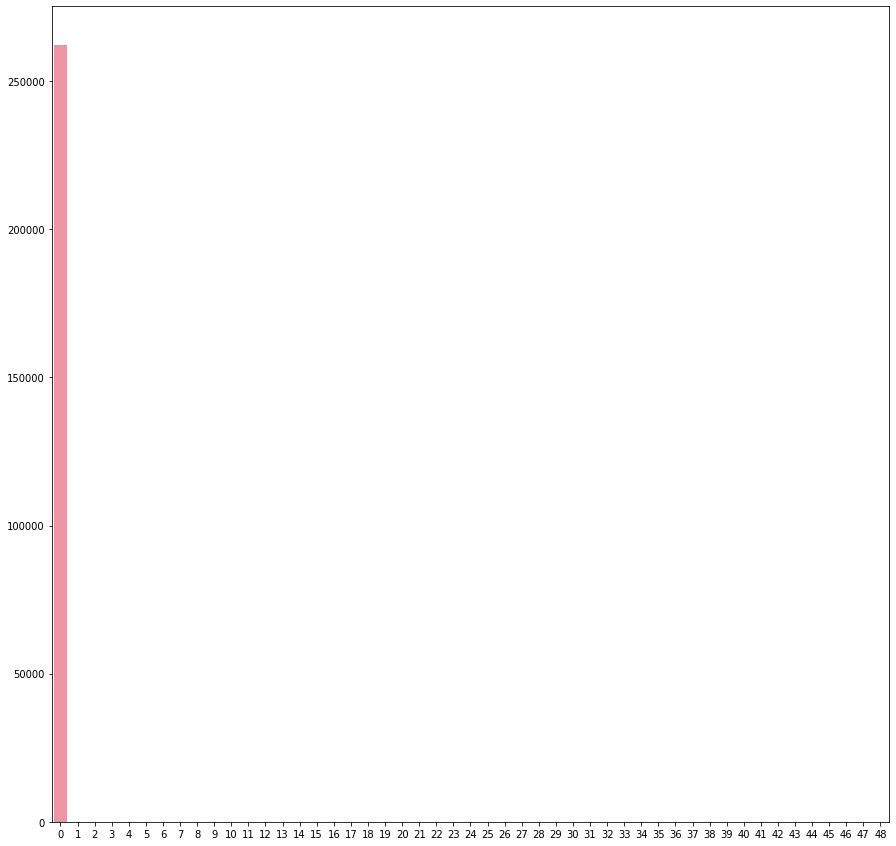

In [31]:
fig,ax=plt.subplots(figsize=(15,15))
sns.barplot([i for i in range(len(fs.scores_))],fs.scores_,ax=ax)

In [55]:
df = pd.DataFrame(columns = ['cat_columnname','chi2_score'])

In [57]:
len(df.index)

0

In [58]:
for i in range(len(fs.scores_)):
    df.loc[len(df.index)] = [data_cat_df.iloc[:,1:50].columns[i],fs.scores_[i]]

In [59]:
df

,cat_columnname,chi2_score
0,Area_Service_Capital/Adirond,0.000227
1,Area_Service_Central NY,0.058359
2,Area_Service_Finger Lakes,0.000122
3,Area_Service_Hudson Valley,0.004921
4,Area_Service_New York City,0.020711
5,Area_Service_Southern Tier,0.054334
6,Area_Service_Western NY,0.113319
7,Age_0 to 17,0.170057
8,Age_18 to 29,0.172469
9,Age_30 to 49,0.760175


In [35]:
len(df.index)

49

In [60]:
#selecting columns with ch2 values greater than 0.5
selected_categorical=[]
for i in range(0,len(df.index)):
     if df.iloc[i,1]>0.5:
        selected_categorical.append(df.iloc[i,0])
selected_categorical

['Age_30 to 49',
 'Gender_U',
 'Cultural_group_Other Race',
 'Cultural_group_Unknown',
 'ethnicity_Spanish/Hispanic',
 'Admission_type_Elective',
 'Admission_type_Emergency',
 'Admission_type_Urgent',
 'Code_illness_0',
 'Code_illness_2',
 'Code_illness_3',
 'Mortality risk_1.0',
 'Mortality risk_3.0',
 'Surg_Description_Medical',
 'Surg_Description_Not Applicable',
 'Surg_Description_Surgical',
 'Abortion_Y',
 'Emergency dept_yes/No_N',
 'Emergency dept_yes/No_Y',
 'Payment_Typology_1',
 'Payment_Typology_2',
 'Payment_Typology_5']

In [61]:
#Adding selected_num and selected_categorical to form new dataset
selected_categorical.append('Result')
selected_features_1=selected_num+selected_categorical
data_featureselected_1= data_final[selected_features_1]


In [62]:
data_featureselected_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 26 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Days_spend_hsptl                 1048575 non-null  int8   
 1   Tot_charg                        1048575 non-null  float64
 2   Tot_cost                         1048575 non-null  float64
 3   Age_30 to 49                     1048575 non-null  uint8  
 4   Gender_U                         1048575 non-null  uint8  
 5   Cultural_group_Other Race        1048575 non-null  uint8  
 6   Cultural_group_Unknown           1048575 non-null  uint8  
 7   ethnicity_Spanish/Hispanic       1048575 non-null  uint8  
 8   Admission_type_Elective          1048575 non-null  uint8  
 9   Admission_type_Emergency         1048575 non-null  uint8  
 10  Admission_type_Urgent            1048575 non-null  uint8  
 11  Code_illness_0                   1048575 non-null 

In [ ]:
################# Recursive Feature Elimination #########################
#This will take 25mins can skip with next line where I selected features from below output 

In [111]:
mid = data_final['Result']
data_final.drop(labels=['Result'], axis=1, inplace = True)


In [114]:
data_final.info()
data_final.insert(56, 'Result', mid)
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 56 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   Days_spend_hsptl                       1048575 non-null  int8   
 1   ccs_diagnosis_code                     1048575 non-null  int64  
 2   ccs_procedure_code                     1048575 non-null  int64  
 3   Weight_baby                            1048575 non-null  int64  
 4   Tot_charg                              1048575 non-null  float64
 5   Tot_cost                               1048575 non-null  float64
 6   ratio_of_total_costs_to_total_charges  1048575 non-null  float64
 7   Area_Service_Capital/Adirond           1048575 non-null  uint8  
 8   Area_Service_Central NY                1048575 non-null  uint8  
 9   Area_Service_Finger Lakes              1048575 non-null  uint8  
 10  Area_Service_Hudson Valley             104

In [115]:
#Feature selection with Recursive Feature Elimination
from sklearn.tree import  DecisionTreeClassifier
from sklearn.feature_selection import RFE
dt = DecisionTreeClassifier()
# create the RFE model for the svm classifier 
# and select attributes
rfe = RFE(dt,n_features_to_select=40)
rfe = rfe.fit(data_final.iloc[:,0:56], data_final['Result'])
# print summaries for the selection of attributes
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True False  True  True
 False  True  True  True  True  True  True False False False  True False
  True  True  True False  True  True  True False False False False False
 False  True  True  True  True  True False False]
[ 1  1  1  1  1  1  1  1  1  1  1  4  1  1  1  1  1  1  1  1  1 13  1  1
  6  1  1  1  1  1  1  8 11 10  1 16  1  1  1  3  1  1  1  2  7 14  9 17
 15  1  1  1  1  1  5 12]


In [116]:
df1 = pd.DataFrame(columns = ['Columnname','Rank'])

In [117]:
for i in range(len(rfe.ranking_)):
    df1.loc[len(df1.index)] = [data_final.columns[i],rfe.ranking_[i]]  

In [118]:
df1

,Columnname,Rank
0,Days_spend_hsptl,1
1,ccs_diagnosis_code,1
2,ccs_procedure_code,1
3,Weight_baby,1
4,Tot_charg,1
5,Tot_cost,1
6,ratio_of_total_costs_to_total_charges,1
7,Area_Service_Capital/Adirond,1
8,Area_Service_Central NY,1
9,Area_Service_Finger Lakes,1


In [119]:
selected_features_2=[]
for i in range(0,len(df1.index)):
     if df1.iloc[i,1]<=5:
        selected_features_2.append(df1.iloc[i,0])
selected_features_2

['Days_spend_hsptl',
 'ccs_diagnosis_code',
 'ccs_procedure_code',
 'Weight_baby',
 'Tot_charg',
 'Tot_cost',
 'ratio_of_total_costs_to_total_charges',
 'Area_Service_Capital/Adirond',
 'Area_Service_Central NY',
 'Area_Service_Finger Lakes',
 'Area_Service_Hudson Valley',
 'Area_Service_New York City',
 'Area_Service_Southern Tier',
 'Area_Service_Western NY',
 'Age_0 to 17',
 'Age_18 to 29',
 'Age_30 to 49',
 'Age_50 to 69',
 'Age_70 or Older',
 'Gender_F',
 'Gender_M',
 'Cultural_group_Black/African American',
 'Cultural_group_Other Race',
 'Cultural_group_White',
 'ethnicity_Not Span/Hispanic',
 'ethnicity_Spanish/Hispanic',
 'ethnicity_Unknown',
 'Admission_type_Elective',
 'Admission_type_Emergency',
 'Admission_type_Urgent',
 'Code_illness_1',
 'Code_illness_2',
 'Code_illness_3',
 'Code_illness_4',
 'Mortality risk_1.0',
 'Mortality risk_2.0',
 'Mortality risk_3.0',
 'Mortality risk_4.0',
 'Emergency dept_yes/No_N',
 'Emergency dept_yes/No_Y',
 'Payment_Typology_1',
 'Payment_T

In [63]:
selected_features_2=['Days_spend_hsptl',
 'ccs_diagnosis_code',
 'ccs_procedure_code',
 'Weight_baby',
 'Tot_charg',
 'Tot_cost',
 'ratio_of_total_costs_to_total_charges',
 'Area_Service_Capital/Adirond',
 'Area_Service_Central NY',
 'Area_Service_Finger Lakes',
 'Area_Service_Hudson Valley',
 'Area_Service_New York City',
 'Area_Service_Southern Tier',
 'Area_Service_Western NY',
 'Age_0 to 17',
 'Age_18 to 29',
 'Age_30 to 49',
 'Age_50 to 69',
 'Age_70 or Older',
 'Gender_F',
 'Gender_M',
 'Cultural_group_Black/African American',
 'Cultural_group_Other Race',
 'Cultural_group_White',
 'ethnicity_Not Span/Hispanic',
 'ethnicity_Spanish/Hispanic',
 'ethnicity_Unknown',
 'Admission_type_Elective',
 'Admission_type_Emergency',
 'Admission_type_Urgent',
 'Code_illness_1',
 'Code_illness_2',
 'Code_illness_3',
 'Code_illness_4',
 'Mortality risk_1.0',
 'Mortality risk_2.0',
 'Mortality risk_3.0',
 'Mortality risk_4.0',
 'Emergency dept_yes/No_N',
 'Emergency dept_yes/No_Y',
 'Payment_Typology_1',
 'Payment_Typology_2',
 'Payment_Typology_3',
 'Payment_Typology_4','Result']
data_featureselected_2=data_final[selected_features_2]

In [ ]:
############################################# data_featureselected_2 imbalance #############################

In [64]:
from sklearn.model_selection import train_test_split
X_train2,X_test2,y_train2,y_test2= train_test_split(data_featureselected_2.iloc[:,0:44], data_featureselected_2.iloc[:,44], test_size=0.25,stratify=data_featureselected_2.iloc[:,44], random_state=42)

In [65]:
#RandomForestClassifier on imbalanced dataset 2 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
rfc1=RandomForestClassifier(random_state=122,class_weight='balanced')
rfc1.fit(X_train2, y_train2)

#Test Data
print('Test Data Report')
pred2_test=rfc1.predict(X_test2)
print(classification_report(y_test2, pred2_test))

#Whole Data
print('Whole Data Report')
pred2_whole=rfc1.predict(data_featureselected_2.iloc[:,0:44])
print(classification_report(data_featureselected_2.iloc[:,44], pred2_whole))

Test Data Report
              precision    recall  f1-score   support

           0       0.25      0.04      0.06     65542
           1       0.75      0.96      0.84    196602

    accuracy                           0.73    262144
   macro avg       0.50      0.50      0.45    262144
weighted avg       0.62      0.73      0.65    262144

Whole Data Report
              precision    recall  f1-score   support

           0       0.96      0.76      0.85    262168
           1       0.92      0.99      0.96    786407

    accuracy                           0.93   1048575
   macro avg       0.94      0.87      0.90   1048575
weighted avg       0.93      0.93      0.93   1048575



In [67]:
#xgboost on  imbalanced dataset 2
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
dtrain = xgb.DMatrix(X_train2, label=y_train2)
dtest = xgb.DMatrix(X_test2, label=y_test2                                                      )
dwhole= xgb.DMatrix(data_featureselected_2.iloc[:,0:44],label=data_featureselected_2.iloc[:,44])
param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 2} 
steps = 50
model = xgb.train(param, dtrain, steps)
preds = model.predict(dtest)

#Test Data
print('Test Data Report')
best_preds = np.asarray([np.argmax(line) for line in preds])
print(classification_report(y_test2, best_preds))

preds = model.predict(dwhole)
best_preds = np.asarray([np.argmax(line) for line in preds])
#Whole Data
print('Whole Data Report')
print(classification_report(data_featureselected_2.iloc[:,44], best_preds))

Test Data Report
              precision    recall  f1-score   support

           0       0.33      0.00      0.00     65542
           1       0.75      1.00      0.86    196602

    accuracy                           0.75    262144
   macro avg       0.54      0.50      0.43    262144
weighted avg       0.65      0.75      0.64    262144

Whole Data Report
              precision    recall  f1-score   support

           0       0.84      0.00      0.00    262168
           1       0.75      1.00      0.86    786407

    accuracy                           0.75   1048575
   macro avg       0.80      0.50      0.43   1048575
weighted avg       0.77      0.75      0.64   1048575



In [73]:
#LogisticRegression on  imbalanced dataset 2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
model = LogisticRegression()
model.fit(X_train2, y_train2) 

#Test Data
print('Test Data Report')
predictions=model.predict(X_test2)
print(classification_report(y_test2, predictions))

#Whole Data
print('Whole Data Report')
predictions=model.predict(data_featureselected_2.iloc[:,0:44])
print(classification_report(data_featureselected_2.iloc[:,44], predictions))

C:\Users\Pavan786\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Test Data Report
              precision    recall  f1-score   support

           0       0.19      0.00      0.00     65542
           1       0.75      1.00      0.86    196602

    accuracy                           0.75    262144
   macro avg       0.47      0.50      0.43    262144
weighted avg       0.61      0.75      0.64    262144

Whole Data Report
              precision    recall  f1-score   support

           0       0.26      0.00      0.00    262168
           1       0.75      1.00      0.86    786407

    accuracy                           0.75   1048575
   macro avg       0.51      0.50      0.43   1048575
weighted avg       0.63      0.75      0.64   1048575



In [72]:
#DecisionTreeClassifier on  imbalanced dataset 2
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train2,y_train2)

#Predict the response for test dataset
y_pred = clf.predict(X_test2)
#Test Data
print('Test Data Report')
print(classification_report(y_test2, y_pred))

#Whole Data
print('Whole Data Report')
y_pred = clf.predict(data_featureselected_2.iloc[:,0:44])
print(classification_report(data_featureselected_2.iloc[:,44],y_pred))

Test Data Report
              precision    recall  f1-score   support

           0       0.25      0.27      0.26     65542
           1       0.75      0.73      0.74    196602

    accuracy                           0.61    262144
   macro avg       0.50      0.50      0.50    262144
weighted avg       0.62      0.61      0.62    262144

Whole Data Report
              precision    recall  f1-score   support

           0       0.80      0.82      0.81    262168
           1       0.94      0.93      0.93    786407

    accuracy                           0.90   1048575
   macro avg       0.87      0.87      0.87   1048575
weighted avg       0.90      0.90      0.90   1048575



In [ ]:
############################################# data_featureselected_2 Under sampling #############################

In [74]:
# transform the dataset
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
under = RandomUnderSampler(random_state=1)
X_u, y_u = under.fit_resample(data_featureselected_2.iloc[:,0:44], data_featureselected_2.iloc[:,44])

In [78]:
pd.crosstab(y_u,'count')

col_0,count
Result,
0,262168
1,262168


In [80]:
from sklearn.model_selection import train_test_split
X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(X_u,y_u,test_size=0.20,random_state=120)

In [81]:
#RandomForestClassifier on Under sampling dataset 2 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
rfc1=RandomForestClassifier(random_state=122)
rfc1.fit(X_train_u, y_train_u)

#Test Data
print('Test Data Report')
pred2_test=rfc1.predict(X_test_u)
print(classification_report(y_test_u, pred2_test))

#Whole Data
print('Whole Data Report')
pred2_whole=rfc1.predict(data_featureselected_2.iloc[:,0:44])
print(classification_report(data_featureselected_2.iloc[:,44], pred2_whole))

Test Data Report
              precision    recall  f1-score   support

           0       0.50      0.52      0.51     52479
           1       0.50      0.48      0.49     52389

    accuracy                           0.50    104868
   macro avg       0.50      0.50      0.50    104868
weighted avg       0.50      0.50      0.50    104868

Whole Data Report
              precision    recall  f1-score   support

           0       0.44      0.90      0.59    262168
           1       0.95      0.62      0.75    786407

    accuracy                           0.69   1048575
   macro avg       0.70      0.76      0.67   1048575
weighted avg       0.82      0.69      0.71   1048575



In [82]:
#xgboost on  Under sampling dataset 2
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
dtrain = xgb.DMatrix(X_train_u, label=y_train_u)
dtest = xgb.DMatrix(X_test_u, label=y_test_u                                                      )
dwhole= xgb.DMatrix(data_featureselected_2.iloc[:,0:44],label=data_featureselected_2.iloc[:,44])
param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 2} 
steps = 50
model = xgb.train(param, dtrain, steps)
preds = model.predict(dtest)

#Test Data
print('Test Data Report')
best_preds = np.asarray([np.argmax(line) for line in preds])
print(classification_report(y_test_u, best_preds))

preds = model.predict(dwhole)
best_preds = np.asarray([np.argmax(line) for line in preds])
#Whole Data
print('Whole Data Report')
print(classification_report(data_featureselected_2.iloc[:,44], best_preds))

Test Data Report
              precision    recall  f1-score   support

           0       0.50      0.50      0.50     52479
           1       0.50      0.50      0.50     52389

    accuracy                           0.50    104868
   macro avg       0.50      0.50      0.50    104868
weighted avg       0.50      0.50      0.50    104868

Whole Data Report
              precision    recall  f1-score   support

           0       0.26      0.51      0.34    262168
           1       0.76      0.51      0.61    786407

    accuracy                           0.51   1048575
   macro avg       0.51      0.51      0.47   1048575
weighted avg       0.63      0.51      0.54   1048575



In [85]:
#LogisticRegression on  Under sampling dataset 2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
model = LogisticRegression()
model.fit(X_train_u, y_train_u) 

#Test Data
print('Test Data Report')
predictions=model.predict(X_test_u)
print(classification_report(y_test_u, predictions))

#Whole Data
print('Whole Data Report')
predictions=model.predict(data_featureselected_2.iloc[:,0:44])
print(classification_report(data_featureselected_2.iloc[:,44], predictions))

Test Data Report
              precision    recall  f1-score   support

           0       0.50      0.72      0.59     52479
           1       0.50      0.28      0.36     52389

    accuracy                           0.50    104868
   macro avg       0.50      0.50      0.48    104868
weighted avg       0.50      0.50      0.48    104868

Whole Data Report
              precision    recall  f1-score   support

           0       0.25      0.72      0.37    262168
           1       0.75      0.28      0.41    786407

    accuracy                           0.39   1048575
   macro avg       0.50      0.50      0.39   1048575
weighted avg       0.62      0.39      0.40   1048575



In [84]:
#DecisionTreeClassifier on  Under sampling  dataset 2
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train_u,y_train_u)

#Predict the response for test dataset
y_pred = clf.predict(X_test_u)
#Test Data
print('Test Data Report')
print(classification_report(y_test_u, y_pred))

#Whole Data
print('Whole Data Report')
y_pred = clf.predict(data_featureselected_2.iloc[:,0:44])
print(classification_report(data_featureselected_2.iloc[:,44], y_pred))

Test Data Report
              precision    recall  f1-score   support

           0       0.50      0.50      0.50     52479
           1       0.50      0.50      0.50     52389

    accuracy                           0.50    104868
   macro avg       0.50      0.50      0.50    104868
weighted avg       0.50      0.50      0.50    104868

Whole Data Report
              precision    recall  f1-score   support

           0       0.45      0.90      0.60    262168
           1       0.95      0.63      0.76    786407

    accuracy                           0.70   1048575
   macro avg       0.70      0.77      0.68   1048575
weighted avg       0.82      0.70      0.72   1048575



In [ ]:
############################################# data_featureselected_2 over sampling #############################

In [86]:
# transform the dataset
from imblearn.over_sampling import RandomOverSampler
over = RandomOverSampler(random_state=1)
X_s, y_s = over.fit_resample(data_featureselected_2.iloc[:,0:44], data_featureselected_2.iloc[:,44])

In [87]:
from sklearn.model_selection import train_test_split
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_s,y_s,test_size=0.20,random_state=120)

In [88]:
#RandomForestClassifier on over sampling dataset 2 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
rfc1=RandomForestClassifier(random_state=122)
rfc1.fit(X_train_o, y_train_o)

#Test Data
print('Test Data Report')
pred2_test=rfc1.predict(X_test_o)
print(classification_report(y_test_o, pred2_test))

#Whole Data
print('Whole Data Report')
pred2_whole=rfc1.predict(data_featureselected_2.iloc[:,0:44])
print(classification_report(data_featureselected_2.iloc[:,44], pred2_whole))

Test Data Report
              precision    recall  f1-score   support

           0       0.87      0.92      0.89    157391
           1       0.91      0.86      0.89    157172

    accuracy                           0.89    314563
   macro avg       0.89      0.89      0.89    314563
weighted avg       0.89      0.89      0.89    314563

Whole Data Report
              precision    recall  f1-score   support

           0       0.91      0.96      0.94    262168
           1       0.99      0.97      0.98    786407

    accuracy                           0.97   1048575
   macro avg       0.95      0.97      0.96   1048575
weighted avg       0.97      0.97      0.97   1048575



In [92]:
#xgboost on  over sampling dataset 2
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
dtrain = xgb.DMatrix(X_train_o, label=y_train_o)
dtest = xgb.DMatrix(X_test_o, label=y_test_o)                                                      
dwhole= xgb.DMatrix(data_featureselected_2.iloc[:,0:44],label=data_featureselected_2.iloc[:,44])
param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 2} 
steps = 50
model = xgb.train(param, dtrain, steps)
preds = model.predict(dtest)

#Test Data
print('Test Data Report')
best_preds = np.asarray([np.argmax(line) for line in preds])
print(classification_report(y_test_o, best_preds))

preds = model.predict(dwhole)
best_preds = np.asarray([np.argmax(line) for line in preds])
#Whole Data
print('Whole Data Report')
print(classification_report(data_featureselected_2.iloc[:,44], best_preds))

Test Data Report
              precision    recall  f1-score   support

           0       0.51      0.49      0.50    157391
           1       0.51      0.53      0.52    157172

    accuracy                           0.51    314563
   macro avg       0.51      0.51      0.51    314563
weighted avg       0.51      0.51      0.51    314563

Whole Data Report
              precision    recall  f1-score   support

           0       0.26      0.49      0.34    262168
           1       0.76      0.53      0.63    786407

    accuracy                           0.52   1048575
   macro avg       0.51      0.51      0.48   1048575
weighted avg       0.63      0.52      0.55   1048575



In [93]:
#LogisticRegression on  over sampling dataset 2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
model = LogisticRegression()
model.fit(X_train_o, y_train_o) 

#Test Data
print('Test Data Report')
predictions=model.predict(X_test_o)
print(classification_report(y_test_o, predictions))

#Whole Data
print('Whole Data Report')
predictions=model.predict(data_featureselected_2.iloc[:,0:44])
print(classification_report(data_featureselected_2.iloc[:,44], predictions))

Test Data Report
              precision    recall  f1-score   support

           0       0.50      0.16      0.24    157391
           1       0.50      0.84      0.63    157172

    accuracy                           0.50    314563
   macro avg       0.50      0.50      0.43    314563
weighted avg       0.50      0.50      0.43    314563

Whole Data Report
              precision    recall  f1-score   support

           0       0.25      0.16      0.19    262168
           1       0.75      0.84      0.79    786407

    accuracy                           0.67   1048575
   macro avg       0.50      0.50      0.49   1048575
weighted avg       0.63      0.67      0.64   1048575



In [90]:
#DecisionTreeClassifier on  over sampling  dataset 2
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train_o,y_train_o)

#Predict the response for test dataset
y_pred = clf.predict(X_test_o)
#Test Data
print('Test Data Report')
print(classification_report(y_test_o, y_pred))

#Whole Data
print('Whole Data Report')
y_pred = clf.predict(data_featureselected_2.iloc[:,0:44])
print(classification_report(data_featureselected_2.iloc[:,44], y_pred))

Test Data Report
              precision    recall  f1-score   support

           0       0.76      0.93      0.84    157391
           1       0.91      0.70      0.79    157172

    accuracy                           0.82    314563
   macro avg       0.84      0.82      0.82    314563
weighted avg       0.84      0.82      0.82    314563

Whole Data Report
              precision    recall  f1-score   support

           0       0.84      0.97      0.90    262168
           1       0.99      0.94      0.96    786407

    accuracy                           0.95   1048575
   macro avg       0.91      0.95      0.93   1048575
weighted avg       0.95      0.95      0.95   1048575

